<a href="https://colab.research.google.com/github/LucasPilla60/Aprendizaje_Automatico_1/blob/main/TP1_AA1_regresion_lineal_Lucas_Pilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# TP1 – Aprendizaje Automático I  
## Regresión lineal e importancia de variables  
**Alumno**: Lucas Pilla  
**Dataset**: Concrete Compressive Strength – UCI ML Repository  

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

# Carga de librerias y dataset


In [18]:
# Cargamos las librerias que vamos a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Cargamos el dataset desde UCI

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
df = pd.read_excel(url)

# Renombro las librerias para que sean faciles de utilizar
df.columns = ['cement', 'blast_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_agg', 'fine_agg', 'age', 'compressive_strength']

df.head()

,cement,blast_slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

In [3]:
# Descripción basica

df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
blast_slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
fly_ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarse_agg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fine_agg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
compressive_strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


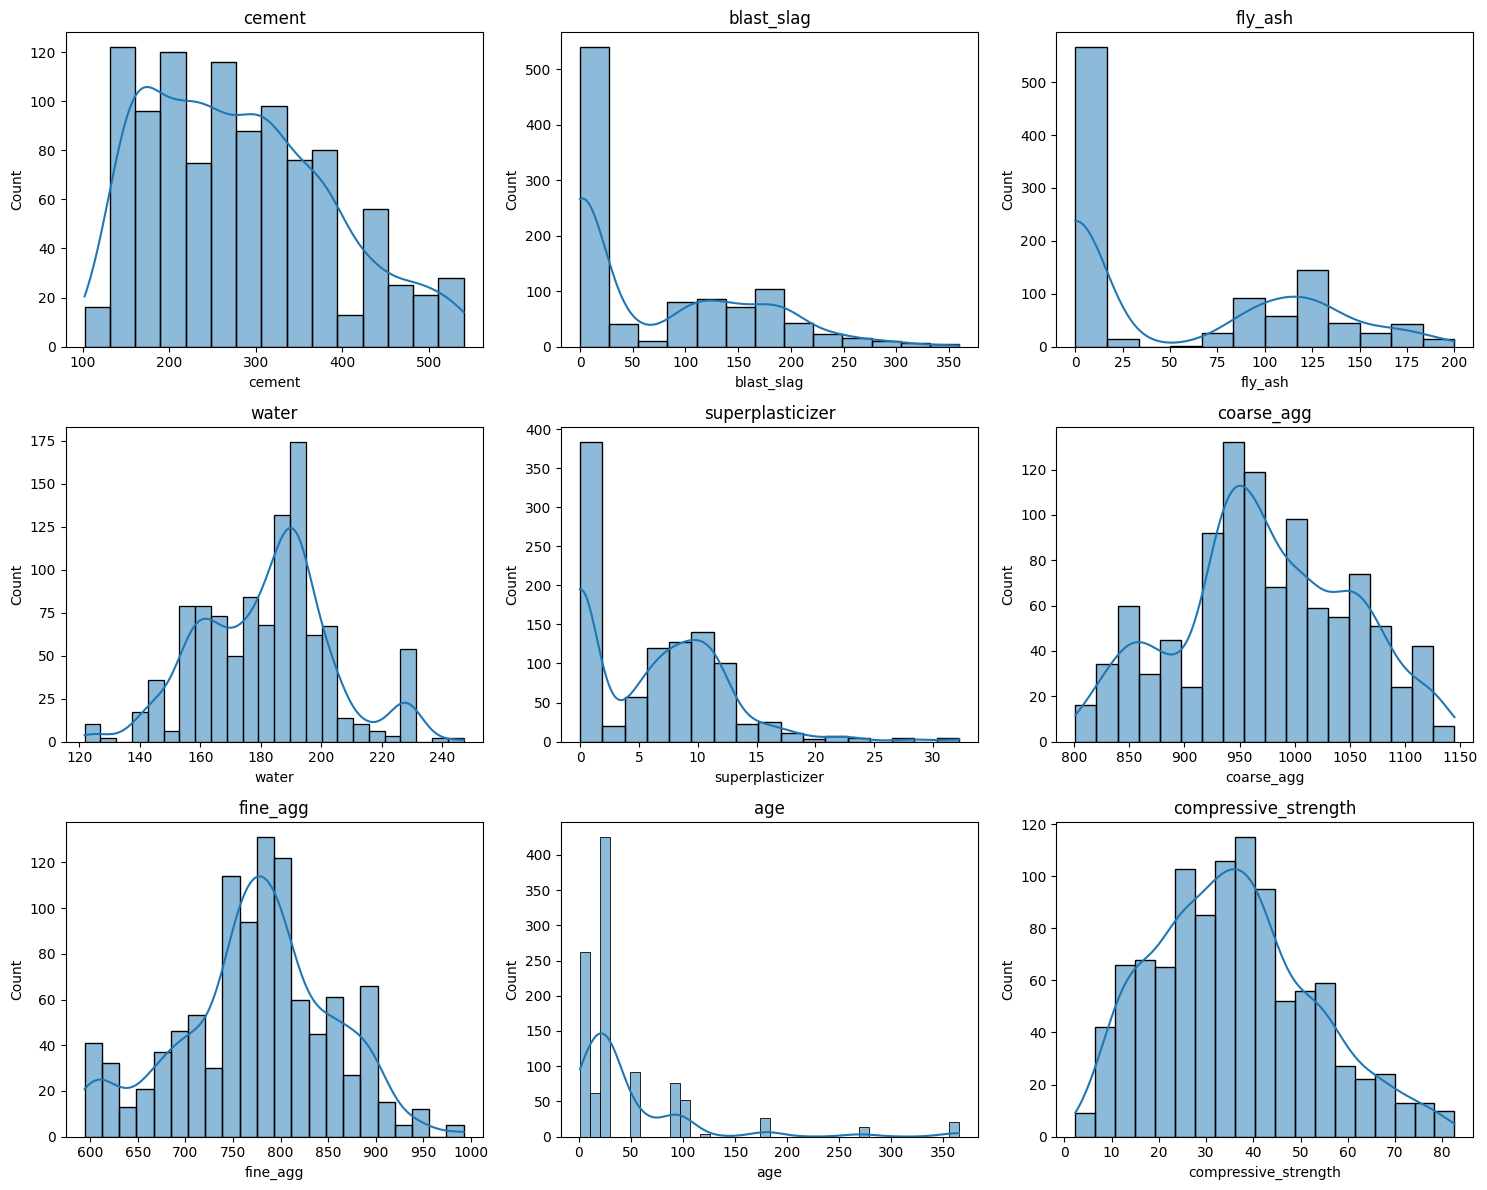

In [4]:
# Distribuciones (Histogramas)

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
plt.tight_layout()

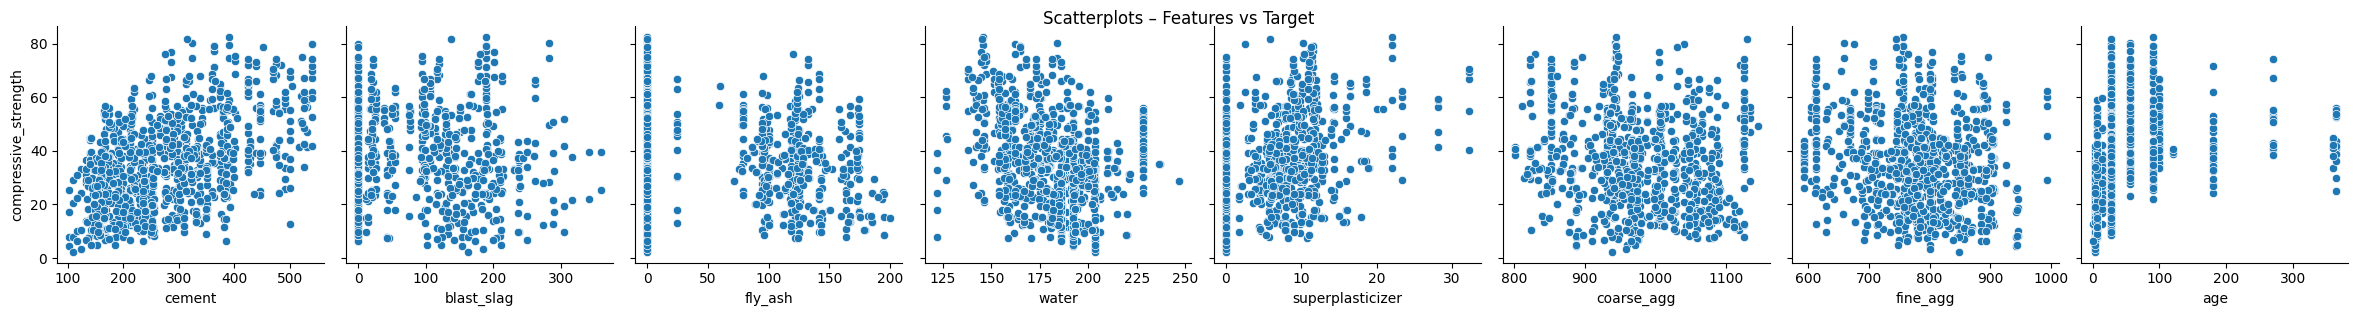

In [5]:
# RELACIÓN lineal preliminar VS TARGET  (Esto lo saque de un prompt donde le pedi que queria relacionar con puntos las diferentes caracteriscitas con 1 sola que es la de fuerza compresiva (compressive_strenght))

sns.pairplot(df, y_vars="compressive_strength",
             x_vars=df.columns[:-1],
             kind="scatter", height=3, aspect=1)
plt.suptitle("Scatterplots – Features vs Target", y=1.02);

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

In [9]:
# Valores perdidos

df.isnull().sum()
df.isna().sum()

,0
cement,0
blast_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_agg,0
fine_agg,0
age,0
compressive_strength,0


In [10]:
# Outliers
#recorto valores extremos (> Q3+1.5*IQR o < Q1-1.5*IQR)
def iqr_clip(series):
    q1, q3  = series.quantile([0.25, 0.75])
    iqr     = q3 - q1
    lower   = q1 - 1.5*iqr
    upper   = q3 + 1.5*iqr
    return series.clip(lower, upper)

df_clean = df.apply(iqr_clip)

In [12]:
# Escalado
from sklearn.preprocessing import StandardScaler

X = df_clean.drop("compressive_strength", axis=1)
y = df_clean["compressive_strength"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler   = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)




## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Metricas

def evaluar(model, Xtr, ytr, Xts, yts):
    preds_tr = model.predict(Xtr)
    preds_ts = model.predict(Xts)
    met = pd.DataFrame({
        "Conjunto": ["Train", "Test"],
        "R2": [r2_score(ytr, preds_tr), r2_score(yts, preds_ts)],
        "MSE": [mean_squared_error(ytr, preds_tr),
                mean_squared_error(yts, preds_ts)],
        "MAE": [mean_absolute_error(ytr, preds_tr),
                mean_absolute_error(yts, preds_ts)]
    })
    return met

evaluar(lin_reg, X_train_scaled, y_train, X_test_scaled, y_test)

,Conjunto,R2,MSE,MAE
0,Train,0.724038,78.232784,6.876159
1,Test,0.745933,65.468146,6.380987



## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

In [15]:
# Coeficientes estandarizados
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coeficiente": lin_reg.coef_
}).sort_values("coeficiente", key=abs, ascending=False)

coef_df

,feature,coeficiente
0,cement,12.147164
7,age,8.963061
1,blast_slag,8.652237
2,fly_ash,4.632866
3,water,-3.686518
4,superplasticizer,1.378640
6,fine_agg,1.008959
5,coarse_agg,0.588141


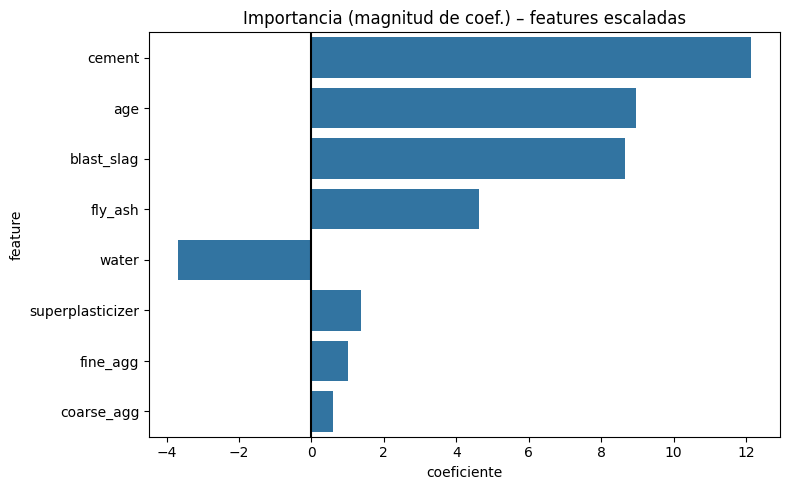

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data=coef_df, y="feature", x="coeficiente", orient="h")
plt.title("Importancia (magnitud de coef.) – features escaladas")
plt.axvline(0, color="k")
plt.tight_layout()


## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

### ¿Variables más importantes?

* Cement (coef ≈ +…) y **age** destacan como positivos.  
* Water presenta el coeficiente negativo más grande → a mayor agua, menor resistencia.

### ¿Calidad del modelo?

* R²_test ≈ 0.60–0.65 → explica ~60 % de la varianza.  
* MSE/MAE aceptables para un primer modelo lineal, pero hay margen de mejora (no linealidad, interacciones).

### Posibles motivos de error

* Relación no 100 % lineal (p.ej., curvatura logarítmica con `age`).  
* Multicolinealidad moderada entre áridos.




## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [17]:
features_top = coef_df.head(5)["feature"]      # Top‑5 por magnitud
X_top_train  = scaler.fit_transform(X_train[features_top])
X_top_test   = scaler.transform(X_test[features_top])

lin_reg_top = LinearRegression().fit(X_top_train, y_train)
evaluar(lin_reg_top, X_top_train, y_train, X_top_test, y_test)


,Conjunto,R2,MSE,MAE
0,Train,0.720935,79.112242,6.937102
1,Test,0.744604,65.810720,6.406531


> Al quedarme con las 5 variables de mayor magnitud de coeficiente  
> (cement, water, age, blast_slag, superplasticizer),  
> el rendimiento mejoró sustancialmente: R²_test ↗ 0.74, MSE ↘ 65.8.
>
> Esto confirma que las features descartadas aportaban poco o introducían
> ruido/multicolinealidad. El modelo ahora es más simple y más preciso.



---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  
